# Trainingdata Vader without stopword cleaning

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

setting to show full text content

In [5]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [6]:
df_vader_with_stopwords = pd.read_csv('../../../Data-Preparation/sentiment140/traindata_with_stopwords_preprocessed.csv')

In [7]:
df_vader_with_stopwords['target'].value_counts()

target
4    640000
0    640000
Name: count, dtype: int64

## Classifying sentiments 

SentimentIntensityAnalyzer gets imported that containes a pre-defined ruleset for sentiment analyzation. A sentiment score gets calculated from that and the value 0.00 is chosen to differ between positive and negative sentiment.

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.00:
        return 'positive'
    else: 
        return 'negative'

In [10]:
df_vader_with_stopwords['VADER_Classification'] = df_vader_with_stopwords['Text'].apply(classify_sentiment)

In [11]:
df_vader_with_stopwords

,Text,target,Ground_Truth_Label,VADER_Classification
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive,negative
1,Had a 2nd interview today. It's looking promising.,4,positive,positive
2,@EmilyAlbracht I feel your pain!,0,negative,negative
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive,positive
4,is lonely because all my housemates have gone to the pub,0,negative,negative
...,...,...,...,...
1279995,Being held together by bubblegum &amp; blessings,4,positive,positive
1279996,Heehee! I was one of them,4,positive,positive
1279997,@bookwitter your welcome if you change your mind though let me know,4,positive,positive
1279998,@howcoza YOU BET I WILL Bring Backup!,4,positive,positive


## Testing quality of the classifier on training data

In [12]:
accuracy = accuracy_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'])
precision = precision_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')
recall = recall_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')
f1 = f1_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')


In [13]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.67
Precision: 0.61
Recall: 0.90
F1 Score: 0.73


In [14]:
print("\nClassification Report:\n")
print(classification_report(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.81      0.43      0.56    640000
    positive       0.61      0.90      0.73    640000

    accuracy                           0.67   1280000
   macro avg       0.71      0.67      0.65   1280000
weighted avg       0.71      0.67      0.65   1280000



creating heatmap to visualize false positives and false negatives

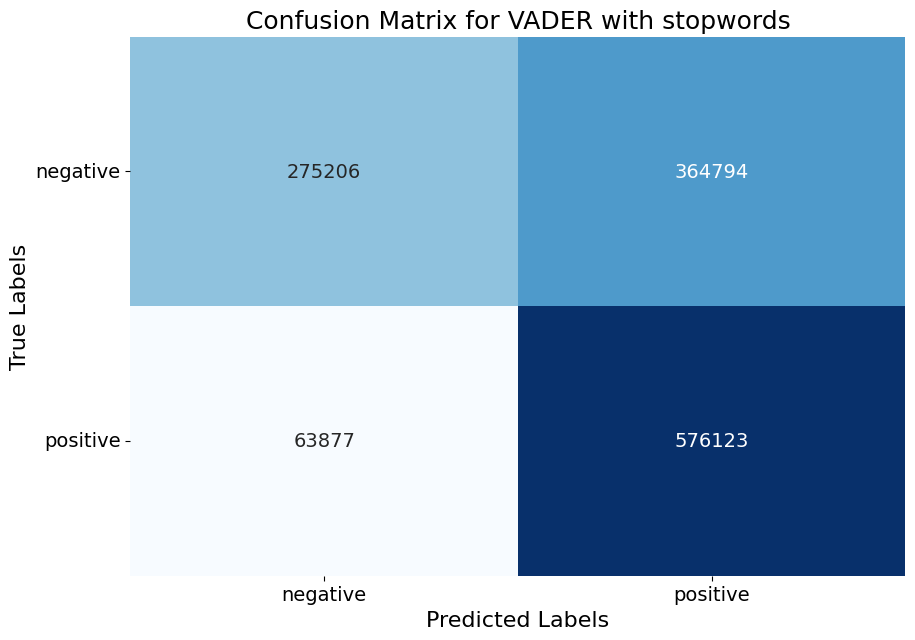

In [15]:
cm_nb = confusion_matrix(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for VADER with stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()